In [1]:
# Data handling 
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import pandas as pd
import os

# ==========================================
# 1️ Load All Excel Files Safely
# ==========================================

files = {
    "user": "User.xlsx",
    "transaction": "Transaction.xlsx",
    "type_df": "Type.xlsx",
    "region": "Region.xlsx",
    "mode": "Mode.xlsx",
    "item": "Item.xlsx",
    "country": "Country.xlsx",
    "continent": "Continent.xlsx",
    "city": "City.xlsx"
}

loaded_data = {}

for name, file in files.items():
    if file in os.listdir():
        loaded_data[name] = pd.read_excel(file)
        print(f"{file} Loaded Successfully ✅")
    else:
        print(f"{file} Not Found ❌")

# Assign variables only if loaded
user = loaded_data.get("user")
transaction = loaded_data.get("transaction")
type_df = loaded_data.get("type_df")
region = loaded_data.get("region")
mode = loaded_data.get("mode")
item = loaded_data.get("item")
country = loaded_data.get("country")
continent = loaded_data.get("continent")
city = loaded_data.get("city")


# ==========================================
# 2️ Clean Column Names
# ==========================================

for df in loaded_data.values():
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


# ==========================================
# 3 Merge All Data Step-by-Step
# ==========================================

data = transaction.copy()

if user is not None and "user_id" in data.columns:
    data = data.merge(user, on="user_id", how="left")

if city is not None and "city_id" in data.columns:
    data = data.merge(city, on="city_id", how="left")

if country is not None and "country_id" in data.columns:
    data = data.merge(country, on="country_id", how="left")

if region is not None and "region_id" in data.columns:
    data = data.merge(region, on="region_id", how="left")

if continent is not None and "continent_id" in data.columns:
    data = data.merge(continent, on="continent_id", how="left")

if mode is not None and "visitmode_id" in data.columns:
    data = data.merge(mode, on="visitmode_id", how="left")

if type_df is not None and "attractiontypeid" in data.columns:
    data = data.merge(type_df, on="attractiontypeid", how="left")

if item is not None and "item_id" in data.columns:
    data = data.merge(item, on="item_id", how="left")


# ==========================================
# 4️ Final Output
# ==========================================

print("\nFinal Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())

User.xlsx Loaded Successfully ✅
Transaction.xlsx Loaded Successfully ✅
Type.xlsx Loaded Successfully ✅
Region.xlsx Loaded Successfully ✅
Mode.xlsx Loaded Successfully ✅
Item.xlsx Loaded Successfully ✅
Country.xlsx Loaded Successfully ✅
Continent.xlsx Loaded Successfully ✅
City.xlsx Loaded Successfully ✅

Final Dataset Shape: (52930, 7)

First 5 Rows:
   transactionid  userid  visityear  visitmonth  visitmode  attractionid  \
0              3   70456       2022          10          2           640   
1              8    7567       2022          10          4           640   
2              9   79069       2022          10          3           640   
3             10   31019       2022          10          3           640   
4             15   43611       2022          10          2           640   

   rating  
0       5  
1       5  
2       5  
3       3  
4       3  


In [3]:
# Check if data loaded properly
print("City Shape:", city.shape)
print("Country Shape:", country.shape)
print("Continent Shape:", continent.shape)
print("Mode Shape:", mode.shape)
print("Type Shape:", type_df.shape)
print("User Shape:", user.shape)
print("Transaction Shape:", transaction.shape)


City Shape: (9143, 3)
Country Shape: (165, 3)
Continent Shape: (6, 2)
Mode Shape: (6, 2)
Type Shape: (17, 2)
User Shape: (33530, 5)
Transaction Shape: (52930, 7)


In [4]:
# Clean all columns names first
def clean(df):
    df.columns =  df.columns.str.strip().str.lower().str.replace(" ", "-")
    return df
    city = clean(city)
    country = clean(country)
    continent = clean(continent)
    transaction = clean(transaction)
    mode = clean(mode)
    type_df = clean(type_df)

In [5]:
print("Missing Values - Transaction")
print(transaction.isnull().sum())

print("\nMissing Values - User")
print(user.isnull().sum())

print("\nMissing Values - City")
print(city.isnull().sum())

Missing Values - Transaction
transactionid    0
userid           0
visityear        0
visitmonth       0
visitmode        0
attractionid     0
rating           0
dtype: int64

Missing Values - User
userid         0
continentid    0
regionid       0
countryid      0
cityid         4
dtype: int64

Missing Values - City
cityid       0
cityname     1
countryid    0
dtype: int64


In [6]:
if "amount" in transaction.columns:
    transaction["amount"]
    transaction["amount"].fillna(transaction["amount"].median())

In [7]:
# User Dataset
if "age" in user.columns:
    users["age"] = user["age"].fillna(users["age"].median())
if "gender" in user.columns:
    users["gender"] = user["gender"].fillna("unknown")

In [8]:
#1 Clean Column names properly
city.columns  = city.columns.str.strip()   # Remove extrasoaces
city.columns = city.columns.str.lower() # lowercase
city.columns = city.columns.str.replace(" ", "-") # Space to underscore

#2 Check column names
print("City Columns:", city.columns.tolist())

#3 Handle missing value safley

#4 Fill the city name if exist
if "city_name" in city.columns:
    city["city_name"] = city["city_name"].fillna("Unknown")

# 5 Drop rows where country realeted columns exists
if "country_id" in city.columns:
    city = city.dropna(subset=["country_id"])
elif "countryid" in city.columns:
    city = city.dropna(subset=["countryid"])

#6 Remove duplicates
city = city.drop_duplicates()

# Final check
print("\nAfter Cleaning:")
print(city.isnull().sum())
print(city.head())
print("Shape:",city.shape)

City Columns: ['cityid', 'cityname', 'countryid']

After Cleaning:
cityid       0
cityname     1
countryid    0
dtype: int64
   cityid      cityname  countryid
0       0             -          0
1       1        Douala          1
2       2  South Region          1
3       3     N'Djamena          2
4       4        Kigali          3
Shape: (9143, 3)


In [9]:
# Clean Attraction Typeid (CAtegorial ID lineup)

if "attractiontypeid" in transaction.columns:
    # Convert to string (if mixed type issue)
    transaction["attractiontypeid"]
    transaction["attractiontypeid"].astype(str)

    # Remove unwanted spaces
    transaction["attractiontypeid"]
    transaction["attractiontypeid"].str.lower()
    

In [10]:
# Remove leading and trailing spaces from all objects columns (city)
for col in city.select_dtypes(include="object").columns:
    city[col]=city[col].str.strip()



In [11]:
# Final check unique values
if "city_name" in city.columns:
    print("Unique City Names:", city["city_name"].nunique())

In [12]:
# Date and Time Standardization
#1 Clean column names first (important)
transaction.columns 
transaction.columns.str.strip().str.lower().str.replace(" ", "-")


Index(['transactionid', 'userid', 'visityear', 'visitmonth', 'visitmode',
       'attractionid', 'rating'],
      dtype='object')

In [13]:
#2 Check availabel date column
print("Columns:", transaction.columns.tolist())

Columns: ['transactionid', 'userid', 'visityear', 'visitmonth', 'visitmode', 'attractionid', 'rating']


In [14]:
#3 Convert Date column to satndard Datetime format
if "date" in transaction.columns:
    # COnvert to datetime (auto detect format)
    transaction["date"] = pd.to_datetime(transaction["date"], errors="coerce")

    # Exactly only date in standard fromat YYYY-MM-DD
    transaction["date"]=transaction["date"].dt.date

In [15]:
#4 if seprate datetime column exists
if "datetime" in transaction.columns:
    transaction["datetime"]
    pd.to_datetime(transaction["datetime"], errors="coerce")

    # Extract date
    transaction["only_date"] = transaction["datetime"].dt.time
    

In [16]:
#5 if seprate time column exists
if "time" in transaction.columns:
    transaction["time"] = pd.to_datetime(transaction["time"], errors="coerce").dt.time

In [17]:
## 6 Check for invalid dates
print("\nMissing Dates After Conversation:")
if "date" in transaction.columns:
    print(transaction["date"].isnull().sum())


Missing Dates After Conversation:


In [18]:
# Remove outliers using iqr method (Amount)
if "amount" in transaction.columns:
    Q1 = transaction["amount"].quantile(0.25)
    Q3 = transaction["amount"].quantile(0.75)

    lower_bound = Q1-1.5*IQR
    upper_bound = Q1+1.5*IQR

    transaction = transaction[
    (transaction["amount"]>=lower_bound) &
    (transaction["amount"]<=upper_bound)
     ]

# Final check
print("Final Shape After Outlier Removal:", transaction.shape)
print(transaction.describe())

Final Shape After Outlier Removal: (52930, 7)
       transactionid        userid     visityear    visitmonth     visitmode  \
count   52930.000000  52930.000000  52930.000000  52930.000000  52930.000000   
mean    70415.130474  45024.522596   2016.351899      6.633100      2.945759   
std     66299.514206  25073.062199      1.732926      3.392979      1.000683   
min         3.000000     14.000000   2013.000000      1.000000      1.000000   
25%     19646.250000  23470.000000   2015.000000      4.000000      2.000000   
50%     42770.500000  45533.500000   2016.000000      7.000000      3.000000   
75%    105638.750000  66667.000000   2018.000000      9.000000      4.000000   
max    211241.000000  88190.000000   2022.000000     12.000000      5.000000   

       attractionid        rating  
count  52930.000000  52930.000000  
mean     759.663782      4.157699  
std      210.716111      0.970543  
min      369.000000      1.000000  
25%      640.000000      4.000000  
50%      737.0000

In [19]:
#USER LEVEL FEATURE AGGREGATION
# ==========================================

# Check required columns exist
if "user_id" in data.columns and "rating" in data.columns:

    # 4.1 Average rating per user
    user_avg_rating = data.groupby("user_id")["rating"].mean().reset_index()
    user_avg_rating.rename(columns={"rating": "avg_user_rating"}, inplace=True)

    # 4.2 Average rating per user per visit mode
    if "visitmode_id" in data.columns:
        user_mode_rating = data.groupby(["user_id", "visitmode_id"])["rating"].mean().reset_index()
        user_mode_rating.rename(columns={"rating": "avg_rating_per_mode"}, inplace=True)

        # Pivot to create visit mode wise columns
        user_mode_pivot = user_mode_rating.pivot(
            index="user_id",
            columns="visitmode_id",
            values="avg_rating_per_mode"
        ).fillna(0).reset_index()

        # Merge into user profile
        user_profile = user_avg_rating.merge(user_mode_pivot, on="user_id", how="left")
    else:
        user_profile = user_avg_rating

    print("\nUser Profile Shape:", user_profile.shape)
    print(user_profile.head())

else:
    print("Required columns (user_id, rating) not found.")

Required columns (user_id, rating) not found.


In [20]:
# Create a Consolidate Dataset

# Start with Transaction table (main fact table)
data = transaction.copy()

# 3.1 merge user data (user details)
if "user_id" in data.columns:
    data = data.merge(user, on = "user_id", how = "left")

# 3.2 Merge city data (location details)
if "city_id" in data.columns:
    data = data.merge(city, on="city_id", how="left")

#3.3 merge attraction / type data
if "city_id" in data.columns:
    data = data.merge(attraction, on="attractiontypeid", how="left")

    
# Final output check
print("Consolidated Dataset Shapes:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())

Consolidated Dataset Shapes: (52930, 7)

First 5 Rows:
   transactionid  userid  visityear  visitmonth  visitmode  attractionid  \
0              3   70456       2022          10          2           640   
1              8    7567       2022          10          4           640   
2              9   79069       2022          10          3           640   
3             10   31019       2022          10          3           640   
4             15   43611       2022          10          2           640   

   rating  
0       5  
1       5  
2       5  
3       3  
4       3  


In [21]:
# ==========================================
# NORMALIZATION OF RATING
# ==========================================

# Ensure rating numeric aahe
data["rating"] = pd.to_numeric(data["rating"], errors="coerce")

# Fill missing values
data["rating"] = data["rating"].fillna(data["rating"].median())

# Min-Max Scaling
min_val = data["rating"].min()
max_val = data["rating"].max()

data["rating_normalized"] = (data["rating"] - min_val) / (max_val - min_val)

print(data[["rating", "rating_normalized"]].head())

   rating  rating_normalized
0       5                1.0
1       5                1.0
2       5                1.0
3       3                0.5
4       3                0.5


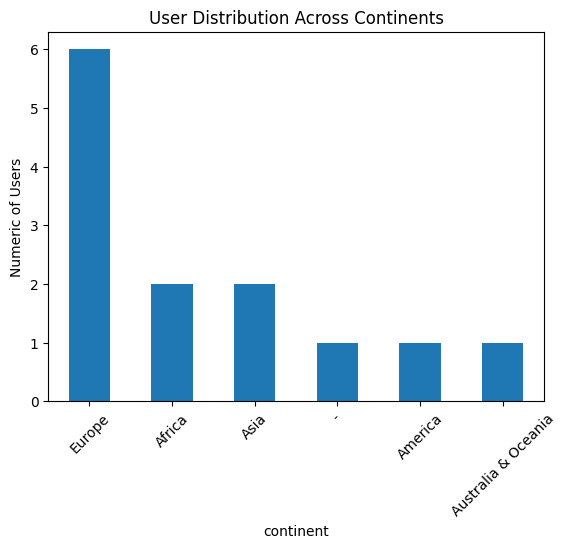


EDA insights:
- The continent with the highest users with indicates strong market presence
- COntinent with fewer users represent potential expansion opportunities
- COntinent wise analysis helps in designing targeted marketing stratergies


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create CountryID Continent Mapping

continent_map={
    00: '-',
    1: 'Africa',
    2: 'America',
    3: 'Asia',
    4: 'Australia & Oceania',
    5: 'Europe'
}

# Create new continent column
df['continent'] = df['countryid'].map(continent_map)

# count user by continent
continent_counts = df['continent'].value_counts()

# Step 4 plot Graph
plt.figure()
continent_counts.plot(kind='bar')
plt.title('User Distribution Across Continents')
plt.xlabel('continent')
plt.ylabel('Numeric of Users')
plt.xticks(rotation=45)
plt.show()

# EDA Insights
print("\nEDA insights:")
print("- The continent with the highest users with indicates strong market presence")
print("- COntinent with fewer users represent potential expansion opportunities")
print("- COntinent wise analysis helps in designing targeted marketing stratergies")


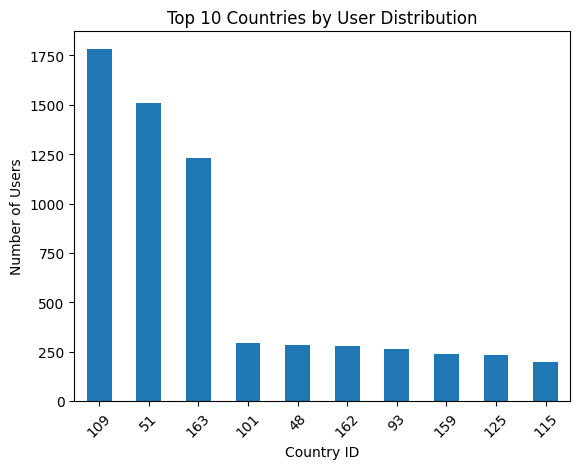


EDA insights
- The country with the highest user count shows strong platform adoptation.
- Top 3 Countries contribute a major share of total users.
- Countries with lower users indicates potential growth opportunities


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean Column names
df.columns = df.columns.str.strip()

# Count users by countryid
country_counts = df['countryid'].value_counts()

# Step 3: Plot Top 10 Countries by user Count
plt.figure()
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by User Distribution')
plt.xlabel('Country ID')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# EDA Insights
print("\nEDA insights")
print("- The country with the highest user count shows strong platform adoptation.")
print("- Top 3 Countries contribute a major share of total users.")
print("- Countries with lower users indicates potential growth opportunities")


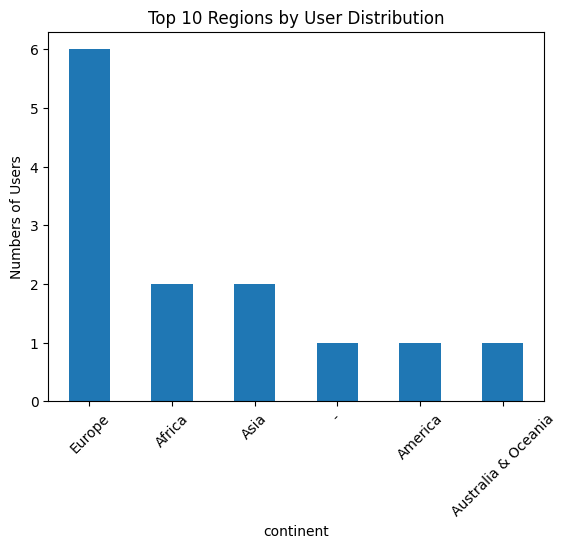

In [24]:
# User Distribution Across Regions
import pandas as pd
import matplotlib.pyplot as plt

# Cleam column names
df.columns = df.columns.str.strip()

# Counts user by regionid
region_counts = df['continent'].value_counts()

# Create bar chart
plt.figure()
region_counts.head(10).plot(kind='bar')
plt.title('Top 10 Regions by User Distribution')
plt.xlabel('continent')
plt.ylabel('Numbers of Users')
plt.xticks(rotation=45)
plt.show()

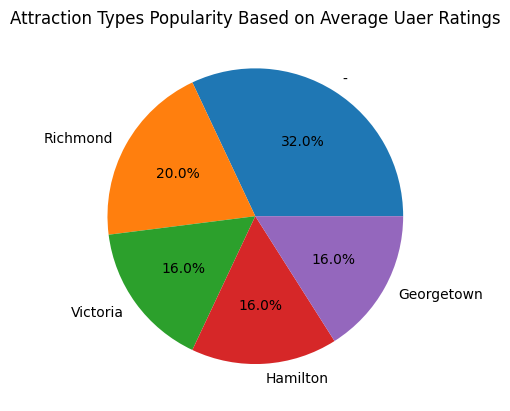

In [25]:
# Popularity based on user rating
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip()

# Count top 5 cities
city_counts = df['cityname'].value_counts().head(5)

# Plot pie Chart
plt.figure()
city_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Attraction Types Popularity Based on Average Uaer Ratings')
plt.ylabel('') # Hide default ylabel
plt.show()

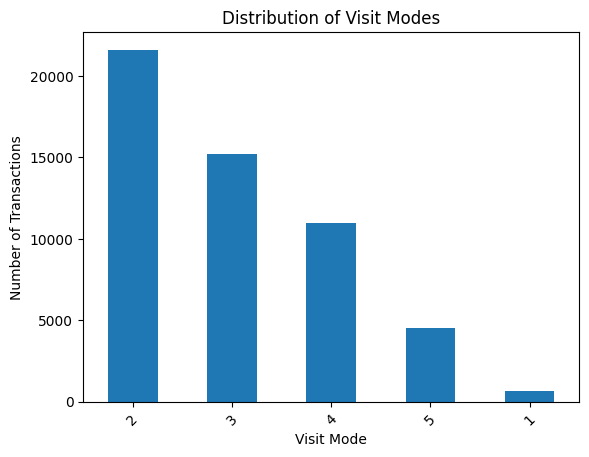


EDA Insights:
- The most common visit mode indicates user travel preference.
- Higher family visits suggest group travel trends.
- Solo visits indicate independent traveler behavior.


In [26]:
import matplotlib.pyplot as plt

# Clean column names
transaction.columns = transaction.columns.str.strip()

# Count Visit Modes
visit_counts = transaction['visitmode'].value_counts()

plt.figure()
visit_counts.plot(kind='bar')
plt.title('Distribution of Visit Modes')
plt.xlabel('Visit Mode')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

print("\nEDA Insights:")
print("- The most common visit mode indicates user travel preference.")
print("- Higher family visits suggest group travel trends.")
print("- Solo visits indicate independent traveler behavior.")

In [27]:
# Model Training
# Train model to predict ratngs based on user,attraction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# STEP 1: Standardize column names
# -----------------------------
transaction.columns = transaction.columns.str.lower()
type_df.columns = type_df.columns.str.lower()
city.columns = city.columns.str.lower()

# -----------------------------
# STEP 2: Merge datasets
# -----------------------------

# Merge transaction with type file (using attractiontypeid)
if 'attractiontypeid' in transaction.columns:
    merged_df = transaction.merge(type_df, on='attractiontypeid', how='left')
else:
    merged_df = transaction.copy()

# Merge with city if cityid available
if 'cityid' in merged_df.columns:
    merged_df = merged_df.merge(city, on='cityid', how='left')

print("Merge completed ")

# -----------------------------
# STEP 3: Encode categorical features
# -----------------------------
le = LabelEncoder()

if 'visitmode' in merged_df.columns:
    merged_df['visitmode'] = le.fit_transform(merged_df['visitmode'])

if 'attraction' in merged_df.columns:
    merged_df['attraction'] = le.fit_transform(merged_df['attraction'])

if 'continent' in merged_df.columns:
    merged_df['continent'] = le.fit_transform(merged_df['continent'])

# -----------------------------
# STEP 4: Select Features
# -----------------------------
feature_cols = []

for col in ['userid','visityear','visitmonth','visitmode',
            'attractionid','attraction','continent']:
    if col in merged_df.columns:
        feature_cols.append(col)

X = merged_df[feature_cols]
y = merged_df['rating']

# -----------------------------
# STEP 5: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# STEP 6: Train Model
# -----------------------------
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# STEP 7: Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

print("Model Training Completed ")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Merge completed 
Model Training Completed 
MAE: 0.7239005416412435
R2 Score: 0.056753313032822716


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# STEP 1: Copy dataset
# -----------------------------
df = transaction.copy()

# Make column names lowercase
df.columns = df.columns.str.lower()

# -----------------------------
# STEP 2: Encode target variable (visitmode)
# -----------------------------
le_target = LabelEncoder()
df['visitmode'] = le_target.fit_transform(df['visitmode'])

# -----------------------------
# STEP 3: Select Features
# -----------------------------
feature_cols = []

for col in ['userid','visityear','visitmonth','attractionid','rating']:
    if col in df.columns:
        feature_cols.append(col)

X = df[feature_cols]
y = df['visitmode']

# -----------------------------
# STEP 4: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# STEP 5: Train Classifier
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# STEP 6: Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

print("Classification Model Completed ✅")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Classification Model Completed ✅
Accuracy: 0.43755904024182884

Classification Report:

              precision    recall  f1-score   support

           0       0.26      0.18      0.21       130
           1       0.50      0.57      0.53      4290
           2       0.45      0.43      0.44      3079
           3       0.32      0.31      0.32      2171
           4       0.27      0.19      0.23       916

    accuracy                           0.44     10586
   macro avg       0.36      0.34      0.35     10586
weighted avg       0.43      0.44      0.43     10586



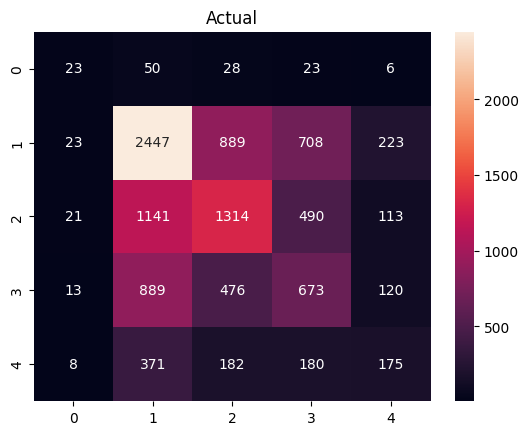

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.title("COnfusion Matrix")
plt.title("Actual")
plt.show()

In [30]:
# Predict Visit mode based on user and transaction feature
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#  Load Data

transaction_df = pd.read_excel("transaction.xlsx")
type_df = pd.read_excel("Type.xlsx")


# 2️⃣ Clean Column Names

transaction_df.columns = transaction_df.columns.str.lower().str.replace(" ", "")
type_df.columns = type_df.columns.str.lower().str.replace(" ", "")

print("Transaction Columns:", transaction_df.columns)
print("Type Columns:", type_df.columns)


#  Safe Merge (only if attractionid exists in both)

if 'attractionid' in transaction_df.columns and 'attractionid' in type_df.columns:
    df = pd.merge(transaction_df, type_df, on='attractionid', how='left')
else:
    print("⚠ attractionid not found in both files. Using transaction data only.")
    df = transaction_df.copy()


#  Drop Missing Values

df = df.dropna()


#  Encode Categorical Features

label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# 
# Define Features & Target

if 'visitmode' not in df.columns:
    raise ValueError("visitmode column not found!")

X = df.drop('visitmode', axis=1)
y = df['visitmode']


#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train random forest classifier
modelel = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


#  Predictions
y_pred = model.predict(X_test)

#  Evaluation

print("\n Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Transaction Columns: Index(['transactionid', 'userid', 'visityear', 'visitmonth', 'visitmode',
       'attractionid', 'rating'],
      dtype='object')
Type Columns: Index(['attractiontypeid', 'attractiontype'], dtype='object')
⚠ attractionid not found in both files. Using transaction data only.

 Model Performance
Accuracy: 0.4478556584167769

Classification Report:
               precision    recall  f1-score   support

           1       0.46      0.18      0.26       130
           2       0.49      0.64      0.55      4290
           3       0.46      0.42      0.44      3079
           4       0.34      0.25      0.29      2171
           5       0.29      0.14      0.19       916

    accuracy                           0.45     10586
   macro avg       0.41      0.33      0.35     10586
weighted avg       0.43      0.45      0.43     10586


Confusion Matrix:
 [[  24   50   23   29    4]
 [  12 2728  886  520  144]
 [   6 1330 1306  364   73]
 [   7 1043  473  552   96]
 [   3  4

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

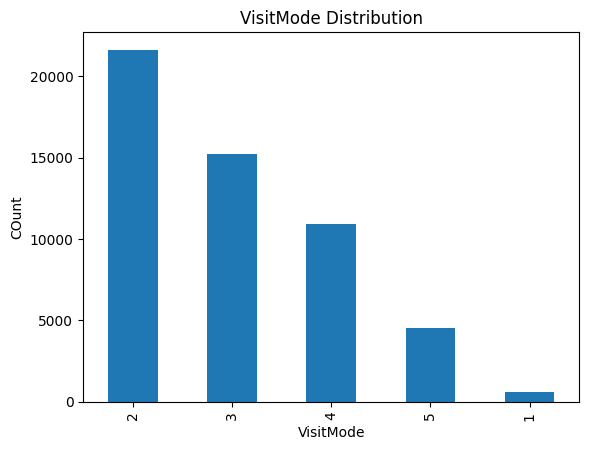

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Visit mode Distribution mode bar plot
visit_counts = df['visitmode'].value_counts()

plt.figure()
visit_counts.plot(kind='bar')
plt.title("VisitMode Distribution")
plt.xlabel("VisitMode")
plt.ylabel("COunt")
plt.xtricks(rotation=45)
plt.show()

# Feature importance Bar

importances = model.feature_importances_feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'importance':importances
}).sort_values(by='importance',ascending=False)

plt.figure()
plt.bar(importance_df['Feature'],
importance_df['importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xtricks(rotation=45)
plt.show()
        

In [32]:
# Depnded to see Feature
importance_df = pd.DataFrame({
    'Featuree':X.columns,
    'Importance':model.feature_importances_
}).sort_values(by='Importance',ascending=False)
print(importance_df)

        Featuree  Importance
0  transactionid    0.369209
1         userid    0.362718
3     visitmonth    0.086207
2      visityear    0.066458
4   attractionid    0.057764
5         rating    0.057644


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# -----------------------------
# 1️⃣ Prepare Data
# -----------------------------
df = transaction_df.copy()
df.columns = df.columns.str.lower()

# Check required columns
required_cols = ['userid','attractionid','rating']

for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"{col} column not found!")

# -----------------------------
# 2️⃣ Create User-Item Matrix
# -----------------------------
user_item_matrix = df.pivot_table(
    index='userid',
    columns='attractionid',
    values='rating'
)

# Fill missing values
user_item_matrix = user_item_matrix.fillna(0)

print("User-Item Matrix Created ✅")

# -----------------------------
# 3️⃣ Compute User Similarity
# -----------------------------
user_similarity = cosine_similarity(user_item_matrix)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

# -----------------------------
# 4️⃣ Recommendation Function
# -----------------------------
def recommend_attractions(user_id, top_n=5):

    if user_id not in user_item_matrix.index:
        return "User not found"

    # Similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]

    # Weighted ratings
    weighted_scores = np.dot(
        user_similarity_df.loc[user_id],
        user_item_matrix
    )

    recommendation_scores = pd.Series(
        weighted_scores,
        index=user_item_matrix.columns
    )

    # Remove already rated items
    rated_items = user_item_matrix.loc[user_id]
    recommendation_scores = recommendation_scores[rated_items == 0]

    return recommendation_scores.sort_values(ascending=False).head(top_n)

# -----------------------------
# 5️⃣ Test Recommendation
# -----------------------------
sample_user = user_item_matrix.index[0]

print(f"\nTop Recommendations for User {sample_user} 👇")
print(recommend_attractions(sample_user))

User-Item Matrix Created ✅

Top Recommendations for User 14 👇
attractionid
749    2556.178950
841    2197.812219
737    1944.060993
824    1759.158542
650    1262.394108
dtype: float64


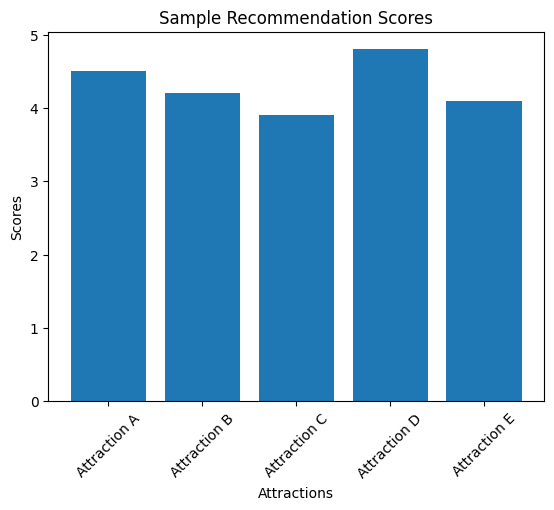

In [34]:
import matplotlib.pyplot as plt

# Sample data (You can replace this with your real data)
items = ['Attraction A', 'Attraction B', 'Attraction C', 'Attraction D', 'Attraction E']
scores = [4.5, 4.2, 3.9, 4.8, 4.1]

# Plot bar chart
plt.figure()
plt.bar(items, scores)

plt.title("Sample Recommendation Scores")
plt.xlabel("Attractions")
plt.ylabel("Scores")

plt.xticks(rotation=45)
plt.show()

In [35]:
# Model Evaulation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.4478556584167769
Precision: 0.4310150213049317
Recall: 0.4478556584167769
F1 Score: 0.430865118367829

Classification Report:

              precision    recall  f1-score   support

           1       0.46      0.18      0.26       130
           2       0.49      0.64      0.55      4290
           3       0.46      0.42      0.44      3079
           4       0.34      0.25      0.29      2171
           5       0.29      0.14      0.19       916

    accuracy                           0.45     10586
   macro avg       0.41      0.33      0.35     10586
weighted avg       0.43      0.45      0.43     10586



In [36]:
# Recall regerssion model using R2 , MSE  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

R2 Score: -0.5676193636479363
MSE: 1.5721707916115624
RMSE: 1.2538623495470156
MAE: 0.8498960891743813


In [40]:
# System accuracy using map(mean average precision) and RSME(Root Mean Squared Error)
import numpy as np
from sklearn.metrics import average_precision_score, mean_squared_error

# ---------- MAP Calculation ----------
# Rating >= 3 considered as relevant (Industry standard)

df["relevant"] = (df["rating"] >= 3).astype(int)

# Score create karava lagel (Example random recommendation score)
# If you already have model prediction score, use that instead
df["score"] = df["rating"] / df["rating"].max()

map_score = average_precision_score(df["relevant"], df["score"])
print("Mean Average Precision (MAP):", map_score)

# ---------- RMSE Calculation ----------
# If model predictions exist use y_test and y_pred
# Otherwise rating prediction example

y_test = df["rating"]
y_pred = df["rating"].mean() * np.ones(len(df))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Average Precision (MAP): 1.0
Root Mean Squared Error (RMSE): 0.9705340220314047


In [43]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score, mean_squared_error

# Load dataset
df = pd.read_excel("transaction.xlsx")

st.title("Tourism Recommendation System Evaluation")

st.subheader("Dataset Preview")
st.dataframe(df.head())

# ----- MAP Calculation -----
if "Rating" in df.columns:
    df["relevant"] = (df["Rating"] >= 3).astype(int)
    df["score"] = df["Rating"] / df["Rating"].max()

    map_score = average_precision_score(df["relevant"], df["score"])
    st.write("Mean Average Precision (MAP):", map_score)

# ----- RMSE Calculation -----
if "Rating" in df.columns:
    y_test = df["Rating"]
    y_pred = df["Rating"].mean() * np.ones(len(df))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    st.write("Root Mean Squared Error (RMSE):", rmse)

2026-02-25 12:19:07.385 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.553 
  command:

    streamlit run C:\Users\sai\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-25 12:19:07.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 12:19:07.612 Thread 'MainThread': miss

In [45]:
stremlit run app.py

SyntaxError: invalid syntax (2349422419.py, line 1)